In [80]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [81]:
df = pd.read_csv('data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [82]:
df.head(5)

Day   t
0 2008-01-01   0
1 2008-01-02  -5
2 2008-01-03 -11
3 2008-01-04 -11
4 2008-01-05 -12

С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [83]:
years_group = df.groupby(df['Day'].dt.year).mean()
print(years_group.idxmin()['t'],years_group.idxmax()['t'])

2012 2015


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [85]:
month_df = df[df['Day'].dt.month == 1]
month_group = month_df[month_df['t']>=0].groupby(month_df['Day'].dt.year).count()
month_group.idxmax()['t']

2008

**3.** В каком году было самое холодное лето (по средней температуре)

In [87]:
summer_df = df[(df['Day'].dt.month>=6) & (df['Day'].dt.month<=8)]
summer_group = summer_df.groupby(summer_df['Day'].dt.year)
summer_group.mean().idxmin()['t']

2008

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [89]:
# ваш код
delta_t = (df['t']-df['t'].shift(-1))
max_delta = delta_t.abs().max()
df[delta_t.abs()==max_delta]

Day   t
2334 2014-05-26  22

**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

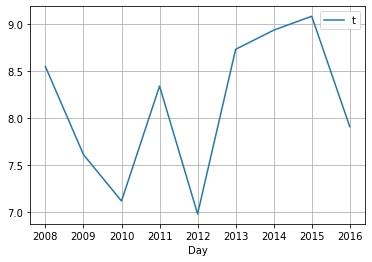

In [93]:
df.groupby(df['Day'].dt.year).mean().plot()
plt.grid()